In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [142]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


#### Trocando Yes e no por 1 e 0

In [143]:
troca = {'yes': 1, 'no': 0 }

dados['sold'] = dados['sold'].map(troca)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


#### Criando uma nova coluna com a idade do carro

In [144]:
ano_atual = datetime.today().year

dados['idade_carro'] = ano_atual - dados['model_year']
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,idade_carro
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


#### Trocando milhas por Kilometros

In [145]:
dados['km_por_ano'] = round(dados['mileage_per_year'] * 1.60934)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,idade_carro,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.0
1,1,7843,1998,40557.96,1,22,12622.0
2,2,7109,2006,89627.50,0,14,11441.0
3,3,26823,2015,95276.14,0,5,43167.0
4,4,7935,2014,117384.68,1,6,12770.0


#### Tirando as colunas desnecessarias!

In [146]:
dados.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1, inplace=True)
dados.head()

,price,sold,idade_carro,km_por_ano
0,30941.02,1,20,35085.0
1,40557.96,1,22,12622.0
2,89627.50,0,14,11441.0
3,95276.14,0,5,43167.0
4,117384.68,1,6,12770.0


In [147]:
features = dados[['price', 'km_por_ano', 'idade_carro',]]
label = dados['sold']

In [148]:
raw_train_x, raw_test_x, train_y, test_y = split(features, label, test_size=0.30, stratify = label)

In [149]:
train_y.value_counts()

1    4060
0    2940
Name: sold, dtype: int64

In [150]:
test_y.value_counts()

1    1740
0    1260
Name: sold, dtype: int64

### Testando o 1º Modelo

In [151]:
SEED = 5
np.random.seed(SEED)

print(f"Treinaremos com {len(raw_train_x)} elementos e testaremos com {len(raw_test_x)} elementos")

modelo = LinearSVC()
modelo.fit(raw_train_x, train_y)
previsoes = modelo.predict(raw_test_x)

acuracia = round((accuracy_score(test_y, previsoes) * 100),2)
print(f'A acurácia foi {acuracia}%')

Treinaremos com 7000 elementos e testaremos com 3000 elementos
A acurácia foi 60.0%


/home/matt/.pyenv/versions/3.7.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Testando o modelo com o baseliner do sklearn

In [152]:
from sklearn.dummy import DummyClassifier

In [153]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(raw_train_x, train_y)
previsoes = dummy_stratified.predict(raw_test_x)

acuracia = round(accuracy_score(test_y, previsoes) * 100,2)
print(f'A acurácia foi {acuracia}%')

A acurácia foi 50.6%


/home/matt/.pyenv/versions/3.7.7/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [154]:
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(raw_train_x, train_y)
previsoes = round(dummy_mostfrequent.score(raw_test_x, test_y) * 100,2)
print(f'Precisão {previsoes}%')

Precisão 52.1%


### Testando modelo SVC

**Precisamos usar o StandardScaler nesse tipo de dado, para normalizá-lô**

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

print(f"Treinaremos com {len(raw_train_x)} elementos e testaremos com {len(raw_test_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_train_x)
treino_x = scaler.transform(raw_train_x)
teste_x = scaler.transform(raw_test_x)

modelo = SVC()
modelo.fit(treino_x, train_y)
previsoes = modelo.predict(teste_x)

acuracia = round((accuracy_score(test_y, previsoes) * 100),2)
print(f'A acurácia foi {acuracia}%')

Treinaremos com 7000 elementos e testaremos com 3000 elementos
A acurácia foi 77.0%


### Testando Modelo Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Não precisamos usar o scaler para esse tipo de modelo..**

In [187]:
SEED = 5
np.random.seed(SEED)

print(f"Treinaremos com {len(raw_train_x)} elementos e testaremos com {len(raw_test_x)} elementos")

# scaler = StandardScaler()
# scaler.fit(raw_train_x)
# treino_x = scaler.transform(raw_train_x)
# teste_x = scaler.transform(raw_test_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_train_x, train_y)
previsoes = modelo.predict(raw_test_x)

acuracia = round((accuracy_score(test_y, previsoes) * 100),2)
print(f'A acurácia foi {acuracia}%')

Treinaremos com 7000 elementos e testaremos com 3000 elementos
A acurácia foi 78.77%


### Visualizando a árvore de decisão

In [188]:
features_name = features.columns
dot_data = export_graphviz(modelo
                           ,feature_names= features_name # Assim consigo vê melhor a árvores
                           ,filled=True  # Coloco cor nas decisões da árvore
                           ,rounded=True  # Coloco borda
                           ,class_names=['Não', 'Sim'])  # Definimos as classes

In [189]:
Grafico = graphviz.Source(dot_data)

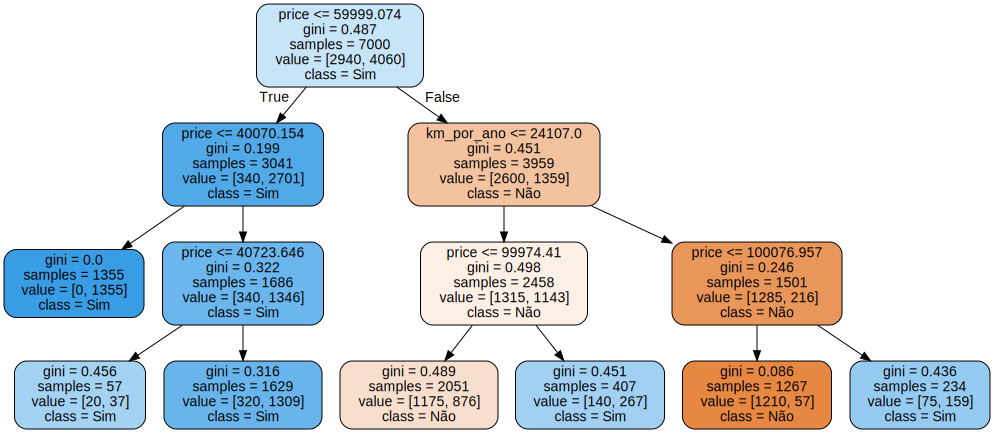

In [190]:
Grafico

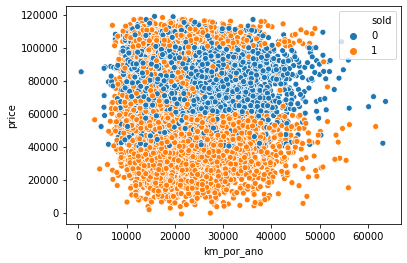

In [164]:
sns.scatterplot(x='km_por_ano', y='price', hue='sold', data=dados)

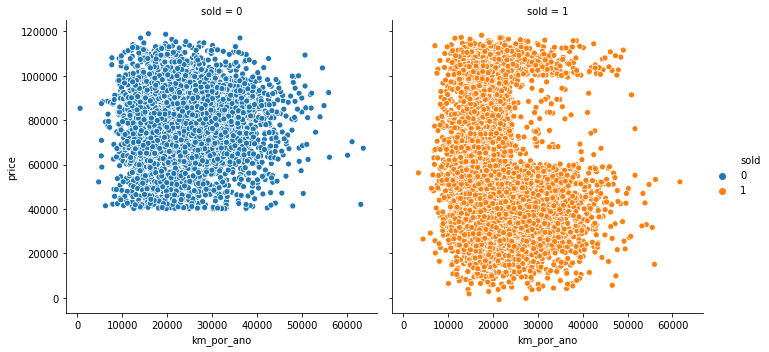

In [163]:
sns.relplot(x='km_por_ano', y='price', col='sold', hue='sold', data=dados)